Fitted power-law exponent: 1.74


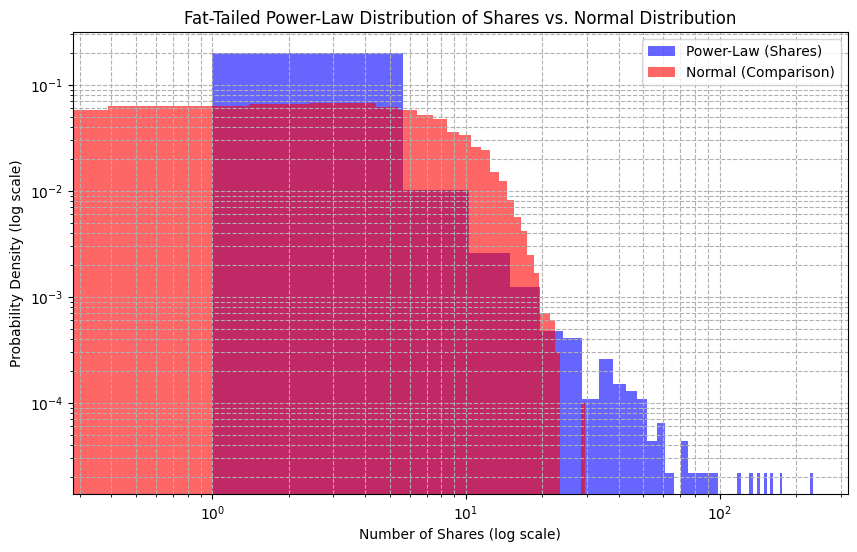

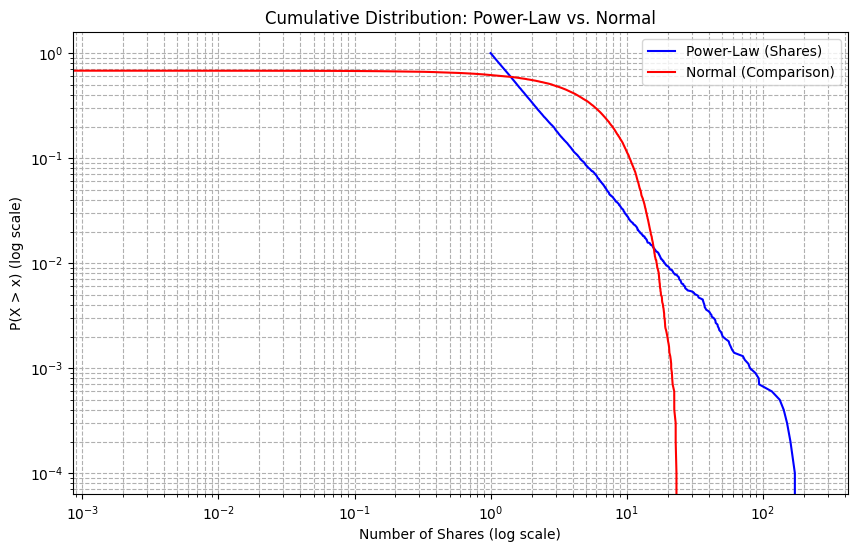

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import powerlaw
from scipy.stats import norm

# Set random seed for reproducibility
np.random.seed(42)

# Parameters for power-law distribution
alpha = 2.5  # Power-law exponent (typical for social media engagement)
xmin = 1     # Minimum value for shares (to avoid zero/infinite issues)
n_samples = 10000  # Number of simulated shares

# Generate power-law distributed data using the inverse CDF method
def generate_powerlaw(alpha, xmin, size):
    r = np.random.uniform(0, 1, size)
    return xmin * (1 - r) ** (-1 / (alpha - 1))

shares = generate_powerlaw(alpha, xmin, n_samples)

# Fit the power-law distribution to confirm the exponent
fit = powerlaw.Fit(shares, xmin=xmin, discrete=True)
fitted_alpha = fit.power_law.alpha
print(f"Fitted power-law exponent: {fitted_alpha:.2f}")

# Generate normal distribution for comparison
normal_data = norm.rvs(loc=np.mean(shares), scale=np.std(shares), size=n_samples)

# Plot histogram of shares (log-log scale for power-law)
plt.figure(figsize=(10, 6))
plt.hist(shares, bins=50, density=True, alpha=0.6, color='blue', label='Power-Law (Shares)')
plt.hist(normal_data, bins=50, density=True, alpha=0.6, color='red', label='Normal (Comparison)')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Number of Shares (log scale)')
plt.ylabel('Probability Density (log scale)')
plt.title('Fat-Tailed Power-Law Distribution of Shares vs. Normal Distribution')
plt.legend()
plt.grid(True, which="both", ls="--")
plt.show()

# Plot cumulative distribution function (CDF) to highlight tail behavior
plt.figure(figsize=(10, 6))
sorted_shares = np.sort(shares)
cdf = np.arange(1, len(sorted_shares) + 1) / len(sorted_shares)
plt.plot(sorted_shares, 1 - cdf, label='Power-Law (Shares)', color='blue')
sorted_normal = np.sort(normal_data)
cdf_normal = np.arange(1, len(sorted_normal) + 1) / len(sorted_normal)
plt.plot(sorted_normal, 1 - cdf_normal, label='Normal (Comparison)', color='red')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Number of Shares (log scale)')
plt.ylabel('P(X > x) (log scale)')
plt.title('Cumulative Distribution: Power-Law vs. Normal')
plt.legend()
plt.grid(True, which="both", ls="--")
plt.show()